In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Random Matrix Generator and Print function

The Matrix will be randomly generated using `np.random.rand`.
The matrix can either be fully randomized (`values = None`), or initialized randomly by choosing values from `values[list|tuple]`. 

The function then returns another function `getMat(...)`, which can be called to explicitly set `t1` and `t2` to any value.

In [127]:
# Define a matrix generator function that takes in two parameters t1 and t2
# and returns a 5x5 matrix with the values of t1 and t2 at random positions.
def getRandomMatrix(N: int, values: None | list | tuple = None):
    if values is None:
        mat = np.random.rand(N,N) + 1j*np.random.rand(N,N)
    else:
        # Choose a random complex matrix with entries in values
        mat = np.random.choice(values, size = (N,N)) + 1j*np.random.choice(values, size = (N,N))
    t1_pos = np.random.randint(0,N, size = 2)
    t2_pos = np.random.randint(0,N, size = 2)
    def getMat(t1, t2):
        mat[*t1_pos] = t1
        mat[*t2_pos] = t2
        return mat
    return getMat

# Ugly function to print the matrix.
def printMatrix(mat):
    m = mat(-666, 666)
    for i in range(len(m)):
        print("| ",end = "")
        for j in range(len(m)):
            top = "t1" if m[i,j] == -666 else ("t2" if m[i,j] == 666 else f"{m[i,j].real:.1f}{'+' if m[i,j].imag > 0 else ''}{m[i,j].imag:.1f}")
            print(top, end = " ")
            if j < len(m)-1:
                l = len(top)
                print(" "*(10-l), end = "")
        print("\t |")

# Matrix Configuration

The visualization is cahracterized using only four components:

- `grid` - The minimum and maximum value for `t1` and `t2`.
- `resolution` - The numerical resolution of the grid. The grid is naively calculated using equidistant points
- `N` - The eigenvalues will be calculated for an `NxN` matrix.
- `values` - The matrix will be randomly initialized with `t1` and `t2` ar random positions. The remaining values are chosen from this list

In [128]:
## Matrix Configuration ##

# x_min,max and y_min,max
grid: float = 10
# Grid resolution, i.e. the number of points is resultuion^2
resolution: int = 300
# The Matrix Dimensions
N: int = 15
# The values to pick from. If None, a random matrix is generated.
values: None | list | tuple = (-1,0,1)

# Calculation of the Eigenvalues

First, calculate the grid using `np.linspace(...)`. This will result in equidistant spacing of the gridpoints. We could also use other random distributions, or even iterate the grid to feature more points where the Eigenvalue density becomes high.

Then, generate a random matrix using `getRandomMatrix(...)`. Iterate the grid points and calculate the Eigenvalues using `np.linalg.eigvals(...)`.

In [123]:
# Generate Grid
g1 = np.linspace(-grid,grid,resolution)
g2 = np.linspace(-grid,grid,resolution)

# Calculate the eigenvalues for each combination of t1 and t2.
matrix = getRandomMatrix(N, values)
eigenvalues = []
for t1 in g1:
    for t2 in g2:
        eigs = np.linalg.eigvals(matrix(t1,t2))
        eigenvalues.extend(eigs)

# Plot

Print the Matrix using the defined print function.

Then plot the Eigenvalues using different styles. In this case, we plot the Eigenvalues using:
- Scatter
- Scatter with smaller points
- Scatter with viridis coloring
- Scatter with twilight coloring

| 1.0+1.0    1.0-1.0    -1.0-1.0   -1.0-1.0   -1.0-1.0   -1.0+1.0   1.0-1.0    -1.00.0    1.0-1.0    -1.0-1.0   1.0-1.0    -1.00.0    -1.00.0    -1.0+1.0   1.0-1.0 	 |
| -1.0-1.0   0.0-1.0    1.0-1.0    -1.0-1.0   1.00.0     0.0-1.0    0.00.0     0.0+1.0    0.0-1.0    1.00.0     1.00.0     1.00.0     0.0+1.0    0.0+1.0    -1.0-1.0 	 |
| 1.00.0     0.00.0     0.00.0     -1.00.0    1.0-1.0    1.00.0     1.00.0     0.0-1.0    -1.0+1.0   0.00.0     -1.00.0    1.0-1.0    1.0-1.0    1.0-1.0    -1.0+1.0 	 |
| 1.0-1.0    1.0-1.0    1.0+1.0    -1.0+1.0   -1.00.0    0.0+1.0    0.0+1.0    1.0+1.0    1.0-1.0    -1.0+1.0   1.0-1.0    1.00.0     1.0-1.0    0.0-1.0    1.00.0 	 |
| -1.00.0    1.0-1.0    0.0-1.0    0.0-1.0    0.00.0     -1.0+1.0   1.0-1.0    1.0+1.0    1.0-1.0    1.0+1.0    -1.00.0    0.00.0     1.0-1.0    -1.0+1.0   1.0+1.0 	 |
| 0.0+1.0    0.00.0     1.0+1.0    -1.0-1.0   -1.0+1.0   0.0-1.0    -1.0-1.0   -1.0+1.0   -1.0+1.0   1.00.0     1.0+1.0    -1.0+1.0   1.0-1.0    1.0-1.0    0.0

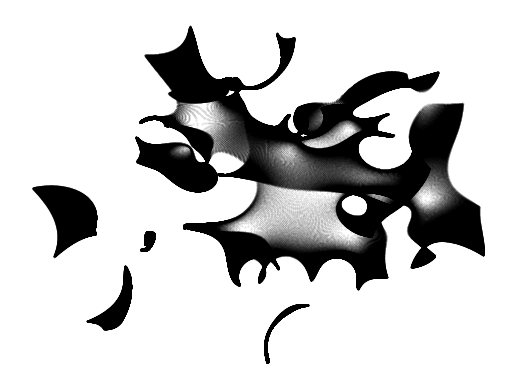

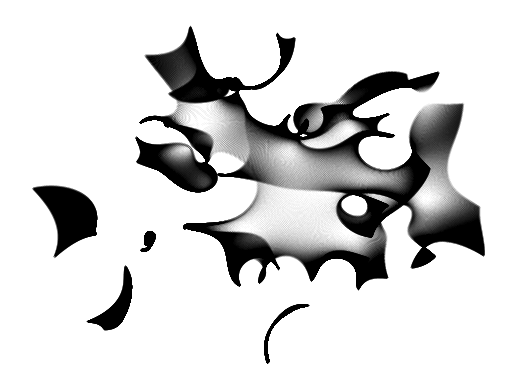

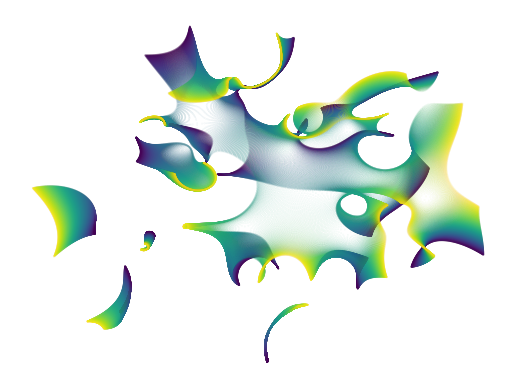

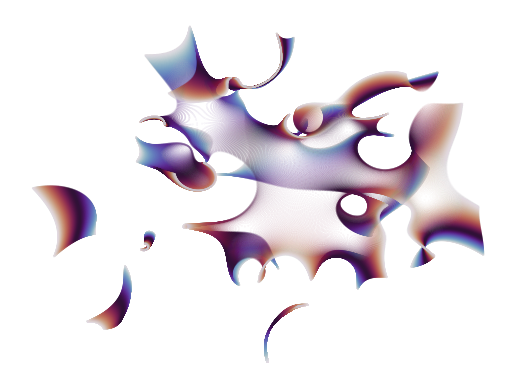

In [124]:
printMatrix(matrix)
abs_values = np.abs(eigenvalues)
c1 = plt.cm.viridis(np.linspace(0,1,len(eigenvalues)))
c2 = plt.cm.twilight(np.linspace(0,1,len(eigenvalues)))

# Plot the eigenvalues on a scatter plot using different styles.
for s,c,alpha in ( (0.1, "black", 0.2), (0.01, "black", 0.2), (0.01, c1, 0.2), (0.01, c2, 0.2) ):
    plt.scatter(np.real(eigenvalues), np.imag(eigenvalues), s = s, c = c, alpha = alpha)
    # Remove Axes and Ticks
    plt.axis("off")
    plt.show()